In [95]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import pickle as pickle
import gzip as gzip
import matplotlib.pyplot as plt

In [108]:
def load_data():
    f = gzip.open("mnist.pkl.gz", 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="bytes")
    return training_data, validation_data, test_data

training_data, validation_data, test_data = load_data()

x_train = torch.FloatTensor(training_data[0])
y_train = torch.LongTensor(training_data[1])
x_test = torch.FloatTensor(test_data[0])
y_test = torch.LongTensor(test_data[1])

In [109]:
class Model(nn.Module):
    def __init__(self, ip_size, hidden_size, op_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(ip_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, op_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = Model(784,200,10)
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)


In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [111]:
def check_accuracy(check_x, check_y, model):
    correct = 0
    samples = 0
    model.eval()
    with torch.no_grad():
        x = check_x
        y = check_y
        y_pred = model(x)
        _, y_pre_indices = torch.max(y_pred,dim=1)
        # tensor1 == tensor2 returns a tensor of bool with element by element checking
        correct_tensor = (y_pre_indices == y)
        correct += torch.sum(correct_tensor).item() # torch.sum() returns a tensor of sum of input
        samples += y_pre_indices.size(0)
        accuracy = round((correct/samples) * 100,4)
        print(f'Accuracy is {correct} / {samples} = {accuracy}')
    model.train()

In [112]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss)
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
        check_accuracy(x_test,y_test,model)
        check_accuracy(x_train,y_train,model)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 2.3085315227508545
Accuracy is 882 / 10000 = 8.82
Accuracy is 4664 / 50000 = 9.328
Epoch: 10 Loss: 1.4546329975128174
Accuracy is 7809 / 10000 = 78.09
Accuracy is 38581 / 50000 = 77.162
Epoch: 20 Loss: 0.8214483857154846
Accuracy is 8418 / 10000 = 84.18
Accuracy is 41397 / 50000 = 82.794
Epoch: 30 Loss: 0.548006534576416
Accuracy is 8746 / 10000 = 87.46
Accuracy is 43133 / 50000 = 86.266
Epoch: 40 Loss: 0.4322053790092468
Accuracy is 8918 / 10000 = 89.18
Accuracy is 44230 / 50000 = 88.46
Epoch: 50 Loss: 0.3730267584323883
Accuracy is 9040 / 10000 = 90.4
Accuracy is 44824 / 50000 = 89.648
Epoch: 60 Loss: 0.3374018371105194
Accuracy is 9120 / 10000 = 91.2
Accuracy is 45289 / 50000 = 90.578
Epoch: 70 Loss: 0.3129739463329315
Accuracy is 9182 / 10000 = 91.82
Accuracy is 45646 / 50000 = 91.292
Epoch: 80 Loss: 0.2943457067012787
Accuracy is 9208 / 10000 = 92.08
Accuracy is 45908 / 50000 = 91.816
Epoch: 90 Loss: 0.2788010239601135
Accuracy is 9238 / 10000 = 92.38
Accuracy is 46

Text(0.5, 0, 'epoch')

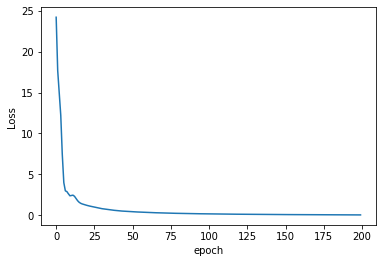

In [104]:
plt.plot(range(epochs),[loss.item() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')